In [1]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv(r'C:\Users\Lenovo\Pictures\Property_Price_Train.csv')
test=pd.read_csv(r'C:\Users\Lenovo\Pictures\Property_Price_Test.csv')

In [3]:
train

Id  Building_Class Zoning_Class  Lot_Extent  Lot_Size Road_Type  \
0        1              60          RLD        65.0      8450     Paved   
1        2              20          RLD        80.0      9600     Paved   
2        3              60          RLD        68.0     11250     Paved   
3        4              70          RLD        60.0      9550     Paved   
4        5              60          RLD        84.0     14260     Paved   
...    ...             ...          ...         ...       ...       ...   
1454  1455              20          FVR        62.0      7500     Paved   
1455  1456              60          RLD        62.0      7917     Paved   
1456  1457              20          RLD        85.0     13175     Paved   
1457  1458              70          RLD        66.0      9042     Paved   
1458  1459              20          RLD        68.0      9717     Paved   

     Lane_Type Property_Shape Land_Outline Utility_Type  ... Pool_Area  \
0          NaN            Reg          Lvl       AllPub  ...         0   
1          NaN            Reg          Lvl       AllPub  ...         0   
2          NaN            IR1          Lvl       AllPub  ...         0   
3          NaN            IR1          Lvl       AllPub  ...         0   
4          NaN            IR1          Lvl       AllPub  ...         0   
...        ...            ...          ...          ...  ...       ...   
1454     Paved            Reg          Lvl       AllPub  ...         0   
1455       NaN            Reg          Lvl       AllPub  ...         0   
1456       NaN            Reg          Lvl       AllPub  ...         0   
1457       NaN            Reg          Lvl       AllPub  ...         0   
1458       NaN            Reg          Lvl       AllPub  ...         0   

     Pool_Quality Fence_Quality Miscellaneous_Feature Miscellaneous_Value  \
0             NaN           NaN                   NaN                   0   
1             NaN           NaN                   NaN                   0   
2             NaN           NaN                   NaN                   0   
3             NaN           NaN                   NaN                   0   
4             NaN           NaN                   NaN                   0   
...           ...           ...                   ...                 ...   
1454          NaN           NaN                   NaN                   0   
1455          NaN           NaN                   NaN                   0   
1456          NaN         MnPrv                   NaN                   0   
1457          NaN         GdPrv                  Shed                2500   
1458          NaN           NaN                   NaN                   0   

     Month_Sold Year_Sold  Sale_Type  Sale_Condition  Sale_Price  
0             2      2008         WD          Normal      208500  
1             5      2007         WD          Normal      181500  
2             9      2008         WD          Normal      223500  
3             2      2006         WD         Abnorml      140000  
4            12      2008         WD          Normal      250000  
...         ...       ...        ...             ...         ...  
1454         10      2009         WD          Normal      185000  
1455          8      2007         WD          Normal      175000  
1456          2      2010         WD          Normal      210000  
1457          5      2010         WD          Normal      266500  
1458          4      2010         WD          Normal      142125  

[1459 rows x 81 columns]

In [4]:
#test

In [5]:
train.shape,test.shape

((1459, 81), (1459, 80))

In [6]:
#train.describe()

In [7]:
#test.describe()

### cleaning train data

In [8]:
num=train.columns[train.dtypes!='object']
cat=train.columns[train.dtypes=='object']
train[num].isnull().sum()

Id                             0
Building_Class                 0
Lot_Extent                   259
Lot_Size                       0
Overall_Material               0
House_Condition                0
Construction_Year              0
Remodel_Year                   0
Brick_Veneer_Area              8
BsmtFinSF1                     0
BsmtFinSF2                     0
BsmtUnfSF                      0
Total_Basement_Area            0
First_Floor_Area               0
Second_Floor_Area              0
LowQualFinSF                   0
Grade_Living_Area              0
Underground_Full_Bathroom      0
Underground_Half_Bathroom      0
Full_Bathroom_Above_Grade      0
Half_Bathroom_Above_Grade      0
Bedroom_Above_Grade            0
Kitchen_Above_Grade            0
Rooms_Above_Grade              0
Fireplaces                     0
Garage_Built_Year             81
Garage_Size                    0
Garage_Area                    0
W_Deck_Area                    0
Open_Lobby_Area                0
Enclosed_L

In [9]:
train=train.drop(['Id','Garage_Built_Year'],axis=1)

In [10]:
train.Lot_Extent=train.Lot_Extent.fillna(train.Lot_Extent.mean())
train.Brick_Veneer_Area=train.Brick_Veneer_Area.fillna(train.Brick_Veneer_Area.mean())

In [11]:
num=train.columns[train.dtypes!='object']
train[num].isnull().sum()

Building_Class               0
Lot_Extent                   0
Lot_Size                     0
Overall_Material             0
House_Condition              0
Construction_Year            0
Remodel_Year                 0
Brick_Veneer_Area            0
BsmtFinSF1                   0
BsmtFinSF2                   0
BsmtUnfSF                    0
Total_Basement_Area          0
First_Floor_Area             0
Second_Floor_Area            0
LowQualFinSF                 0
Grade_Living_Area            0
Underground_Full_Bathroom    0
Underground_Half_Bathroom    0
Full_Bathroom_Above_Grade    0
Half_Bathroom_Above_Grade    0
Bedroom_Above_Grade          0
Kitchen_Above_Grade          0
Rooms_Above_Grade            0
Fireplaces                   0
Garage_Size                  0
Garage_Area                  0
W_Deck_Area                  0
Open_Lobby_Area              0
Enclosed_Lobby_Area          0
Three_Season_Lobby_Area      0
Screen_Lobby_Area            0
Pool_Area                    0
Miscella

In [12]:
train[cat].isnull().sum()

Zoning_Class                0
Road_Type                   0
Lane_Type                1368
Property_Shape              0
Land_Outline                0
Utility_Type                0
Lot_Configuration           0
Property_Slope              0
Neighborhood                0
Condition1                  0
Condition2                  0
House_Type                  0
House_Design                0
Roof_Design                 0
Roof_Quality                0
Exterior1st                 0
Exterior2nd                 0
Brick_Veneer_Type           8
Exterior_Material           0
Exterior_Condition          0
Foundation_Type             0
Basement_Height            37
Basement_Condition         37
Exposure_Level             38
BsmtFinType1               37
BsmtFinType2               38
Heating_Type                0
Heating_Quality             0
Air_Conditioning            0
Electrical_System           1
Kitchen_Quality             0
Functional_Rate             0
Fireplace_Quality         689
Garage    

In [13]:
train=train.drop(['Lane_Type','Fireplace_Quality','Pool_Quality','Fence_Quality','Fence_Quality','Miscellaneous_Feature'],axis=1)

In [14]:
train.Garage_Condition.value_counts()

TA    1325
Fa      35
Gd       9
Po       7
Ex       2
Name: Garage_Condition, dtype: int64

In [15]:
train.Brick_Veneer_Type=train.Brick_Veneer_Type.fillna('BrkCmn')
train.Basement_Height=train.Basement_Height.fillna('Fa')
train.Basement_Condition=train.Basement_Condition.fillna('TA')
train.Exposure_Level=train.Exposure_Level.fillna('Mn')
train.BsmtFinType1=train.BsmtFinType1.fillna('LwQ')
train.BsmtFinType2=train.BsmtFinType2.fillna('GLQ')
train.Electrical_System=train.Electrical_System.fillna('Mix')
train.Garage =train.Garage .fillna('2Types')
train.Garage_Finish_Year=train.Garage_Finish_Year.fillna('Fin')
train.Garage_Quality=train.Garage_Quality.fillna('Po')
train.Garage_Condition=train.Garage_Condition.fillna('Ex')

In [16]:
cat=train.columns[train.dtypes=='object']
train[cat].isnull().sum()

Zoning_Class          0
Road_Type             0
Property_Shape        0
Land_Outline          0
Utility_Type          0
Lot_Configuration     0
Property_Slope        0
Neighborhood          0
Condition1            0
Condition2            0
House_Type            0
House_Design          0
Roof_Design           0
Roof_Quality          0
Exterior1st           0
Exterior2nd           0
Brick_Veneer_Type     0
Exterior_Material     0
Exterior_Condition    0
Foundation_Type       0
Basement_Height       0
Basement_Condition    0
Exposure_Level        0
BsmtFinType1          0
BsmtFinType2          0
Heating_Type          0
Heating_Quality       0
Air_Conditioning      0
Electrical_System     0
Kitchen_Quality       0
Functional_Rate       0
Garage                0
Garage_Finish_Year    0
Garage_Quality        0
Garage_Condition      0
Pavedd_Drive          0
Sale_Type             0
Sale_Condition        0
dtype: int64

In [17]:
train[cat].dtypes

Zoning_Class          object
Road_Type             object
Property_Shape        object
Land_Outline          object
Utility_Type          object
Lot_Configuration     object
Property_Slope        object
Neighborhood          object
Condition1            object
Condition2            object
House_Type            object
House_Design          object
Roof_Design           object
Roof_Quality          object
Exterior1st           object
Exterior2nd           object
Brick_Veneer_Type     object
Exterior_Material     object
Exterior_Condition    object
Foundation_Type       object
Basement_Height       object
Basement_Condition    object
Exposure_Level        object
BsmtFinType1          object
BsmtFinType2          object
Heating_Type          object
Heating_Quality       object
Air_Conditioning      object
Electrical_System     object
Kitchen_Quality       object
Functional_Rate       object
Garage                object
Garage_Finish_Year    object
Garage_Quality        object
Garage_Conditi

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
train.Zoning_Class = le.fit_transform(train.Zoning_Class)
train.Road_Type =le.fit_transform(train.Road_Type)
train.Property_Shape =le.fit_transform(train.Property_Shape)
train.Land_Outline =le.fit_transform(train.Land_Outline)
train.Utility_Type =le.fit_transform(train.Utility_Type)
train.Lot_Configuration =le.fit_transform(train.Lot_Configuration)
train.Property_Slope =le.fit_transform(train.Property_Slope)
train.Neighborhood =le.fit_transform(train.Neighborhood)
train.Condition1 =le.fit_transform(train.Condition1)
train.Condition2 =le.fit_transform(train.Condition2)
train.House_Type =le.fit_transform(train.House_Type)
train.House_Design =le.fit_transform(train.House_Design)
train.Roof_Design =le.fit_transform(train.Roof_Design)
train.Roof_Quality =le.fit_transform(train.Roof_Quality)
train.Exterior1st =le.fit_transform(train.Exterior1st)
train.Exterior2nd =le.fit_transform(train.Exterior2nd)
train.Brick_Veneer_Type =le.fit_transform(train.Brick_Veneer_Type)
train.Exterior_Material =le.fit_transform(train.Exterior_Material)
train.Exterior_Condition =le.fit_transform(train.Exterior_Condition)
train.Foundation_Type =le.fit_transform(train.Foundation_Type)
train.Basement_Height =le.fit_transform(train.Basement_Height)
train.Basement_Condition =le.fit_transform(train.Basement_Condition)
train.Exposure_Level =le.fit_transform(train.Exposure_Level)
train.BsmtFinType1 =le.fit_transform(train.BsmtFinType1)
train.BsmtFinType2 =le.fit_transform(train.BsmtFinType2)
train.Heating_Type =le.fit_transform(train.Heating_Type)
train.Heating_Quality = le.fit_transform(train.Heating_Quality)
train.Air_Conditioning = le.fit_transform(train.Air_Conditioning)
train.Electrical_System = le.fit_transform(train.Electrical_System)
train.Kitchen_Quality = le.fit_transform(train.Kitchen_Quality)
train.Functional_Rate = le.fit_transform(train.Functional_Rate)
train.Garage = le.fit_transform(train.Garage)
train.Garage_Finish_Year = le.fit_transform(train.Garage_Finish_Year)
train.Garage_Quality = le.fit_transform(train.Garage_Quality)
train.Garage_Condition = le.fit_transform(train.Garage_Condition)
train.Pavedd_Drive = le.fit_transform(train.Pavedd_Drive)
train.Sale_Type = le.fit_transform(train.Sale_Type)
train.Sale_Condition = le.fit_transform(train.Sale_Condition)
train.Heating_Quality = le.fit_transform(train.Heating_Quality)

In [20]:
#train[cat].dtypes

### cleaning test data

In [21]:
num1=test.columns[test.dtypes!='object']
cat1=test.columns[test.dtypes=='object']
test[num1].isnull().sum()

Id                             0
Building_Class                 0
Lot_Extent                   227
Lot_Size                       0
Overall_Material               0
House_Condition                0
Construction_Year              0
Remodel_Year                   0
Brick_Veneer_Area             15
BsmtFinSF1                     1
BsmtFinSF2                     1
BsmtUnfSF                      1
Total_Basement_Area            1
First_Floor_Area               0
Second_Floor_Area              0
LowQualFinSF                   0
Grade_Living_Area              0
Underground_Full_Bathroom      2
Underground_Half_Bathroom      2
Full_Bathroom_Above_Grade      0
Half_Bathroom_Above_Grade      0
Bedroom_Above_Grade            0
Kitchen_Above_Grade            0
Rooms_Above_Grade              0
Fireplaces                     0
Garage_Built_Year             78
Garage_Size                    1
Garage_Area                    1
W_Deck_Area                    0
Open_Lobby_Area                0
Enclosed_L

In [22]:
test=test.drop(['Id','Garage_Built_Year'],axis=1)

In [23]:
test.Lot_Extent=test.Lot_Extent.fillna(test.Lot_Extent.mean())
test.Brick_Veneer_Area =test.Brick_Veneer_Area .fillna(test.Brick_Veneer_Area .mean())
test.BsmtFinSF1=test.BsmtFinSF1.fillna(test.BsmtFinSF1.mean())
test.BsmtFinSF2=test.BsmtFinSF2.fillna(test.BsmtFinSF2.mean())
test.BsmtUnfSF=test.BsmtUnfSF.fillna(test.BsmtUnfSF.mean())
test.Total_Basement_Area =test.Total_Basement_Area .fillna(test.Total_Basement_Area .mean())
test.Underground_Full_Bathroom =test.Underground_Full_Bathroom .fillna(test.Underground_Full_Bathroom .mean())
test.Underground_Half_Bathroom=test.Underground_Half_Bathroom.fillna(test.Underground_Half_Bathroom.mean())
test.Garage_Size=test.Garage_Size.fillna(test.Garage_Size.mean())
test.Garage_Area=test.Garage_Area.fillna(test.Garage_Area.mean())

In [24]:
num1=test.columns[test.dtypes!='object']
test[num1].isnull().sum()

Building_Class               0
Lot_Extent                   0
Lot_Size                     0
Overall_Material             0
House_Condition              0
Construction_Year            0
Remodel_Year                 0
Brick_Veneer_Area            0
BsmtFinSF1                   0
BsmtFinSF2                   0
BsmtUnfSF                    0
Total_Basement_Area          0
First_Floor_Area             0
Second_Floor_Area            0
LowQualFinSF                 0
Grade_Living_Area            0
Underground_Full_Bathroom    0
Underground_Half_Bathroom    0
Full_Bathroom_Above_Grade    0
Half_Bathroom_Above_Grade    0
Bedroom_Above_Grade          0
Kitchen_Above_Grade          0
Rooms_Above_Grade            0
Fireplaces                   0
Garage_Size                  0
Garage_Area                  0
W_Deck_Area                  0
Open_Lobby_Area              0
Enclosed_Lobby_Area          0
Three_Season_Lobby_Area      0
Screen_Lobby_Area            0
Pool_Area                    0
Miscella

In [25]:
test[cat1].isnull().sum()

Zoning_Class                4
Road_Type                   0
Lane_Type                1352
Property_Shape              0
Land_Outline                0
Utility_Type                2
Lot_Configuration           0
Property_Slope              0
Neighborhood                0
Condition1                  0
Condition2                  0
House_Type                  0
House_Design                0
Roof_Design                 0
Roof_Quality                0
Exterior1st                 1
Exterior2nd                 1
Brick_Veneer_Type          16
Exterior_Material           0
Exterior_Condition          0
Foundation_Type             0
Basement_Height            44
Basement_Condition         45
Exposure_Level             44
BsmtFinType1               42
BsmtFinType2               42
Heating_Type                0
Heating_Quality             0
Air_Conditioning            0
Electrical_System           0
Kitchen_Quality             1
Functional_Rate             2
Fireplace_Quality         730
Garage    

In [26]:
test=test.drop(['Lane_Type','Fireplace_Quality','Pool_Quality','Fence_Quality','Fence_Quality','Miscellaneous_Feature'],axis=1)

In [27]:
test.Sale_Type.value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: Sale_Type, dtype: int64

In [28]:
test.Zoning_Class=train.Zoning_Class.fillna('RHD')
test.Utility_Type=train.Utility_Type.fillna('AllPub')
test.Exterior1st=train.Exterior1st.fillna('CB')
test.Exterior2nd=train.Exterior2nd.fillna('Stone')
test.Brick_Veneer_Type=train.Brick_Veneer_Type.fillna('BrkCmn ')
test.Basement_Height=train.Basement_Height.fillna('Fa')
test.Basement_Condition=train.Basement_Condition.fillna('Po')
test.Exposure_Level=train.Exposure_Level.fillna('Mn')
test.BsmtFinType1=train.BsmtFinType1.fillna('LwQ')
test.BsmtFinType2=train.BsmtFinType2.fillna('GLQ')
test.Kitchen_Quality=train.Kitchen_Quality.fillna('Fa')
test.Functional_Rate=train.Functional_Rate.fillna('Ms')
test.Garage=train.Garage.fillna('CarPort')
test.Garage_Finish_Year=train.Garage_Finish_Year.fillna('Fin')
test.Garage_Quality=train.Garage_Quality.fillna('Po')
test.Garage_Condition=train.Garage_Condition.fillna('Ex')
test.Sale_Type=train.Sale_Type.fillna('ConLw ')

In [29]:
cat1=test.columns[test.dtypes=='object']
test[cat1].isnull().sum()

Road_Type             0
Property_Shape        0
Land_Outline          0
Lot_Configuration     0
Property_Slope        0
Neighborhood          0
Condition1            0
Condition2            0
House_Type            0
House_Design          0
Roof_Design           0
Roof_Quality          0
Exterior_Material     0
Exterior_Condition    0
Foundation_Type       0
Heating_Type          0
Heating_Quality       0
Air_Conditioning      0
Electrical_System     0
Pavedd_Drive          0
Sale_Condition        0
dtype: int64

In [30]:
test[cat1].dtypes

Road_Type             object
Property_Shape        object
Land_Outline          object
Lot_Configuration     object
Property_Slope        object
Neighborhood          object
Condition1            object
Condition2            object
House_Type            object
House_Design          object
Roof_Design           object
Roof_Quality          object
Exterior_Material     object
Exterior_Condition    object
Foundation_Type       object
Heating_Type          object
Heating_Quality       object
Air_Conditioning      object
Electrical_System     object
Pavedd_Drive          object
Sale_Condition        object
dtype: object

In [31]:
test.Road_Type =le.fit_transform(test.Road_Type)
test.Property_Shape =le.fit_transform(test.Property_Shape)
test.Land_Outline =le.fit_transform(test.Land_Outline)
test.Lot_Configuration =le.fit_transform(test.Lot_Configuration)
test.Property_Slope =le.fit_transform(test.Property_Slope)
test.Neighborhood =le.fit_transform(test.Neighborhood)
test.Condition1 =le.fit_transform(test.Condition1)
test.Condition2 =le.fit_transform(test.Condition2)
test.House_Type =le.fit_transform(test.House_Type)
test.House_Design =le.fit_transform(test.House_Design)
test.Roof_Design =le.fit_transform(test.Roof_Design)
test.Roof_Quality =le.fit_transform(test.Roof_Quality)
test.Exterior_Material =le.fit_transform(test.Exterior_Material)
test.Exterior_Condition =le.fit_transform(test.Exterior_Condition)
test.Foundation_Type =le.fit_transform(test.Foundation_Type)
test.Heating_Type =le.fit_transform(test.Heating_Type)
test.Heating_Quality = le.fit_transform(test.Heating_Quality)
test.Air_Conditioning = le.fit_transform(test.Air_Conditioning)
test.Electrical_System = le.fit_transform(test.Electrical_System)
test.Pavedd_Drive = le.fit_transform(test.Pavedd_Drive)
test.Sale_Condition = le.fit_transform(test.Sale_Condition)

In [32]:
test[cat].dtypes

Zoning_Class          int32
Road_Type             int32
Property_Shape        int32
Land_Outline          int32
Utility_Type          int32
Lot_Configuration     int32
Property_Slope        int32
Neighborhood          int32
Condition1            int32
Condition2            int32
House_Type            int32
House_Design          int32
Roof_Design           int32
Roof_Quality          int32
Exterior1st           int32
Exterior2nd           int32
Brick_Veneer_Type     int32
Exterior_Material     int32
Exterior_Condition    int32
Foundation_Type       int32
Basement_Height       int32
Basement_Condition    int32
Exposure_Level        int32
BsmtFinType1          int32
BsmtFinType2          int32
Heating_Type          int32
Heating_Quality       int32
Air_Conditioning      int32
Electrical_System     int32
Kitchen_Quality       int32
Functional_Rate       int32
Garage                int32
Garage_Finish_Year    int32
Garage_Quality        int32
Garage_Condition      int32
Pavedd_Drive        

In [33]:
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [34]:
train.shape,test.shape

((1459, 74), (1459, 73))

## EDA

In [35]:
train_1=train.corr()
train_1

Building_Class  Zoning_Class  Lot_Extent  Lot_Size  Road_Type  \
Building_Class        1.000000      0.035882   -0.357020 -0.139852  -0.024937   
Zoning_Class          0.035882      1.000000   -0.106357 -0.034453   0.087656   
Lot_Extent           -0.357020     -0.106357    1.000000  0.306801  -0.037333   
Lot_Size             -0.139852     -0.034453    0.306801  1.000000  -0.197129   
Road_Type            -0.024937      0.087656   -0.037333 -0.197129   1.000000   
...                        ...           ...         ...       ...        ...   
Month_Sold           -0.013660     -0.031500    0.010178  0.001200   0.003695   
Year_Sold            -0.021330     -0.020623    0.006746 -0.014256  -0.025050   
Sale_Type             0.012656      0.097450   -0.030899  0.012305   0.014326   
Sale_Condition       -0.024822      0.009500    0.058435  0.034178   0.006055   
Sale_Price           -0.084563     -0.166896    0.334992  0.263843   0.041057   

                Property_Shape  Land_Outline  Utility_Type  Lot_Configuration  \
Building_Class        0.119793     -0.002752 -2.286547e-02           0.076301   
Zoning_Class          0.061923     -0.017845 -1.192852e-03          -0.009877   
Lot_Extent           -0.145053     -0.075701  2.937024e-17          -0.181359   
Lot_Size             -0.165317     -0.149076  1.012216e-02          -0.121152   
Road_Type            -0.010259      0.115985  1.682922e-03           0.013935   
...                        ...           ...           ...                ...   
Month_Sold           -0.033400     -0.011573 -5.155406e-02           0.018954   
Year_Sold             0.036384      0.020478  2.335519e-02          -0.006051   
Sale_Type            -0.001073     -0.025823 -1.267684e-01           0.014197   
Sale_Condition       -0.038234      0.033766 -8.969829e-02           0.051500   
Sale_Price           -0.255428      0.015545 -1.432272e-02          -0.067234   

                Property_Slope  ...  Enclosed_Lobby_Area  \
Building_Class       -0.025814  ...             0.030441   
Zoning_Class         -0.022062  ...            -0.004703   
Lot_Extent            0.067637  ...            -0.009987   
Lot_Size              0.436867  ...             0.003951   
Road_Type            -0.179353  ...            -0.002879   
...                        ...  ...                  ...   
Month_Sold            0.007053  ...            -0.027018   
Year_Sold            -0.002283  ...            -0.019800   
Sale_Type             0.054910  ...            -0.034601   
Sale_Condition       -0.043064  ...            -0.002685   
Sale_Price            0.051091  ...             0.020789   

                Three_Season_Lobby_Area  Screen_Lobby_Area  Pool_Area  \
Building_Class                -0.043906          -0.026199   0.008244   
Zoning_Class                   0.000359           0.019081  -0.003130   
Lot_Extent                     0.062353           0.037727   0.180882   
Lot_Size                       0.020418           0.043151   0.077670   
Road_Type                      0.007479          -0.033149   0.004416   
...                                 ...                ...        ...   
Month_Sold                     0.029465           0.023196  -0.033742   
Year_Sold                      0.018656           0.010720  -0.059683   
Sale_Type                     -0.009010           0.004591   0.011024   
Sale_Condition                 0.004396          -0.020057  -0.067243   
Sale_Price                     0.044553           0.111378   0.092389   

                Miscellaneous_Value  Month_Sold  Year_Sold  Sale_Type  \
Building_Class            -0.007738   -0.013660  -0.021330   0.012656   
Zoning_Class               0.009290   -0.031500  -0.020623   0.097450   
Lot_Extent                 0.001176    0.010178   0.006746  -0.030899   
Lot_Size                   0.038064    0.001200  -0.014256   0.012305   
Road_Type                 -0.022729    0.003695  -0.025050   0.014326   
...                             ..

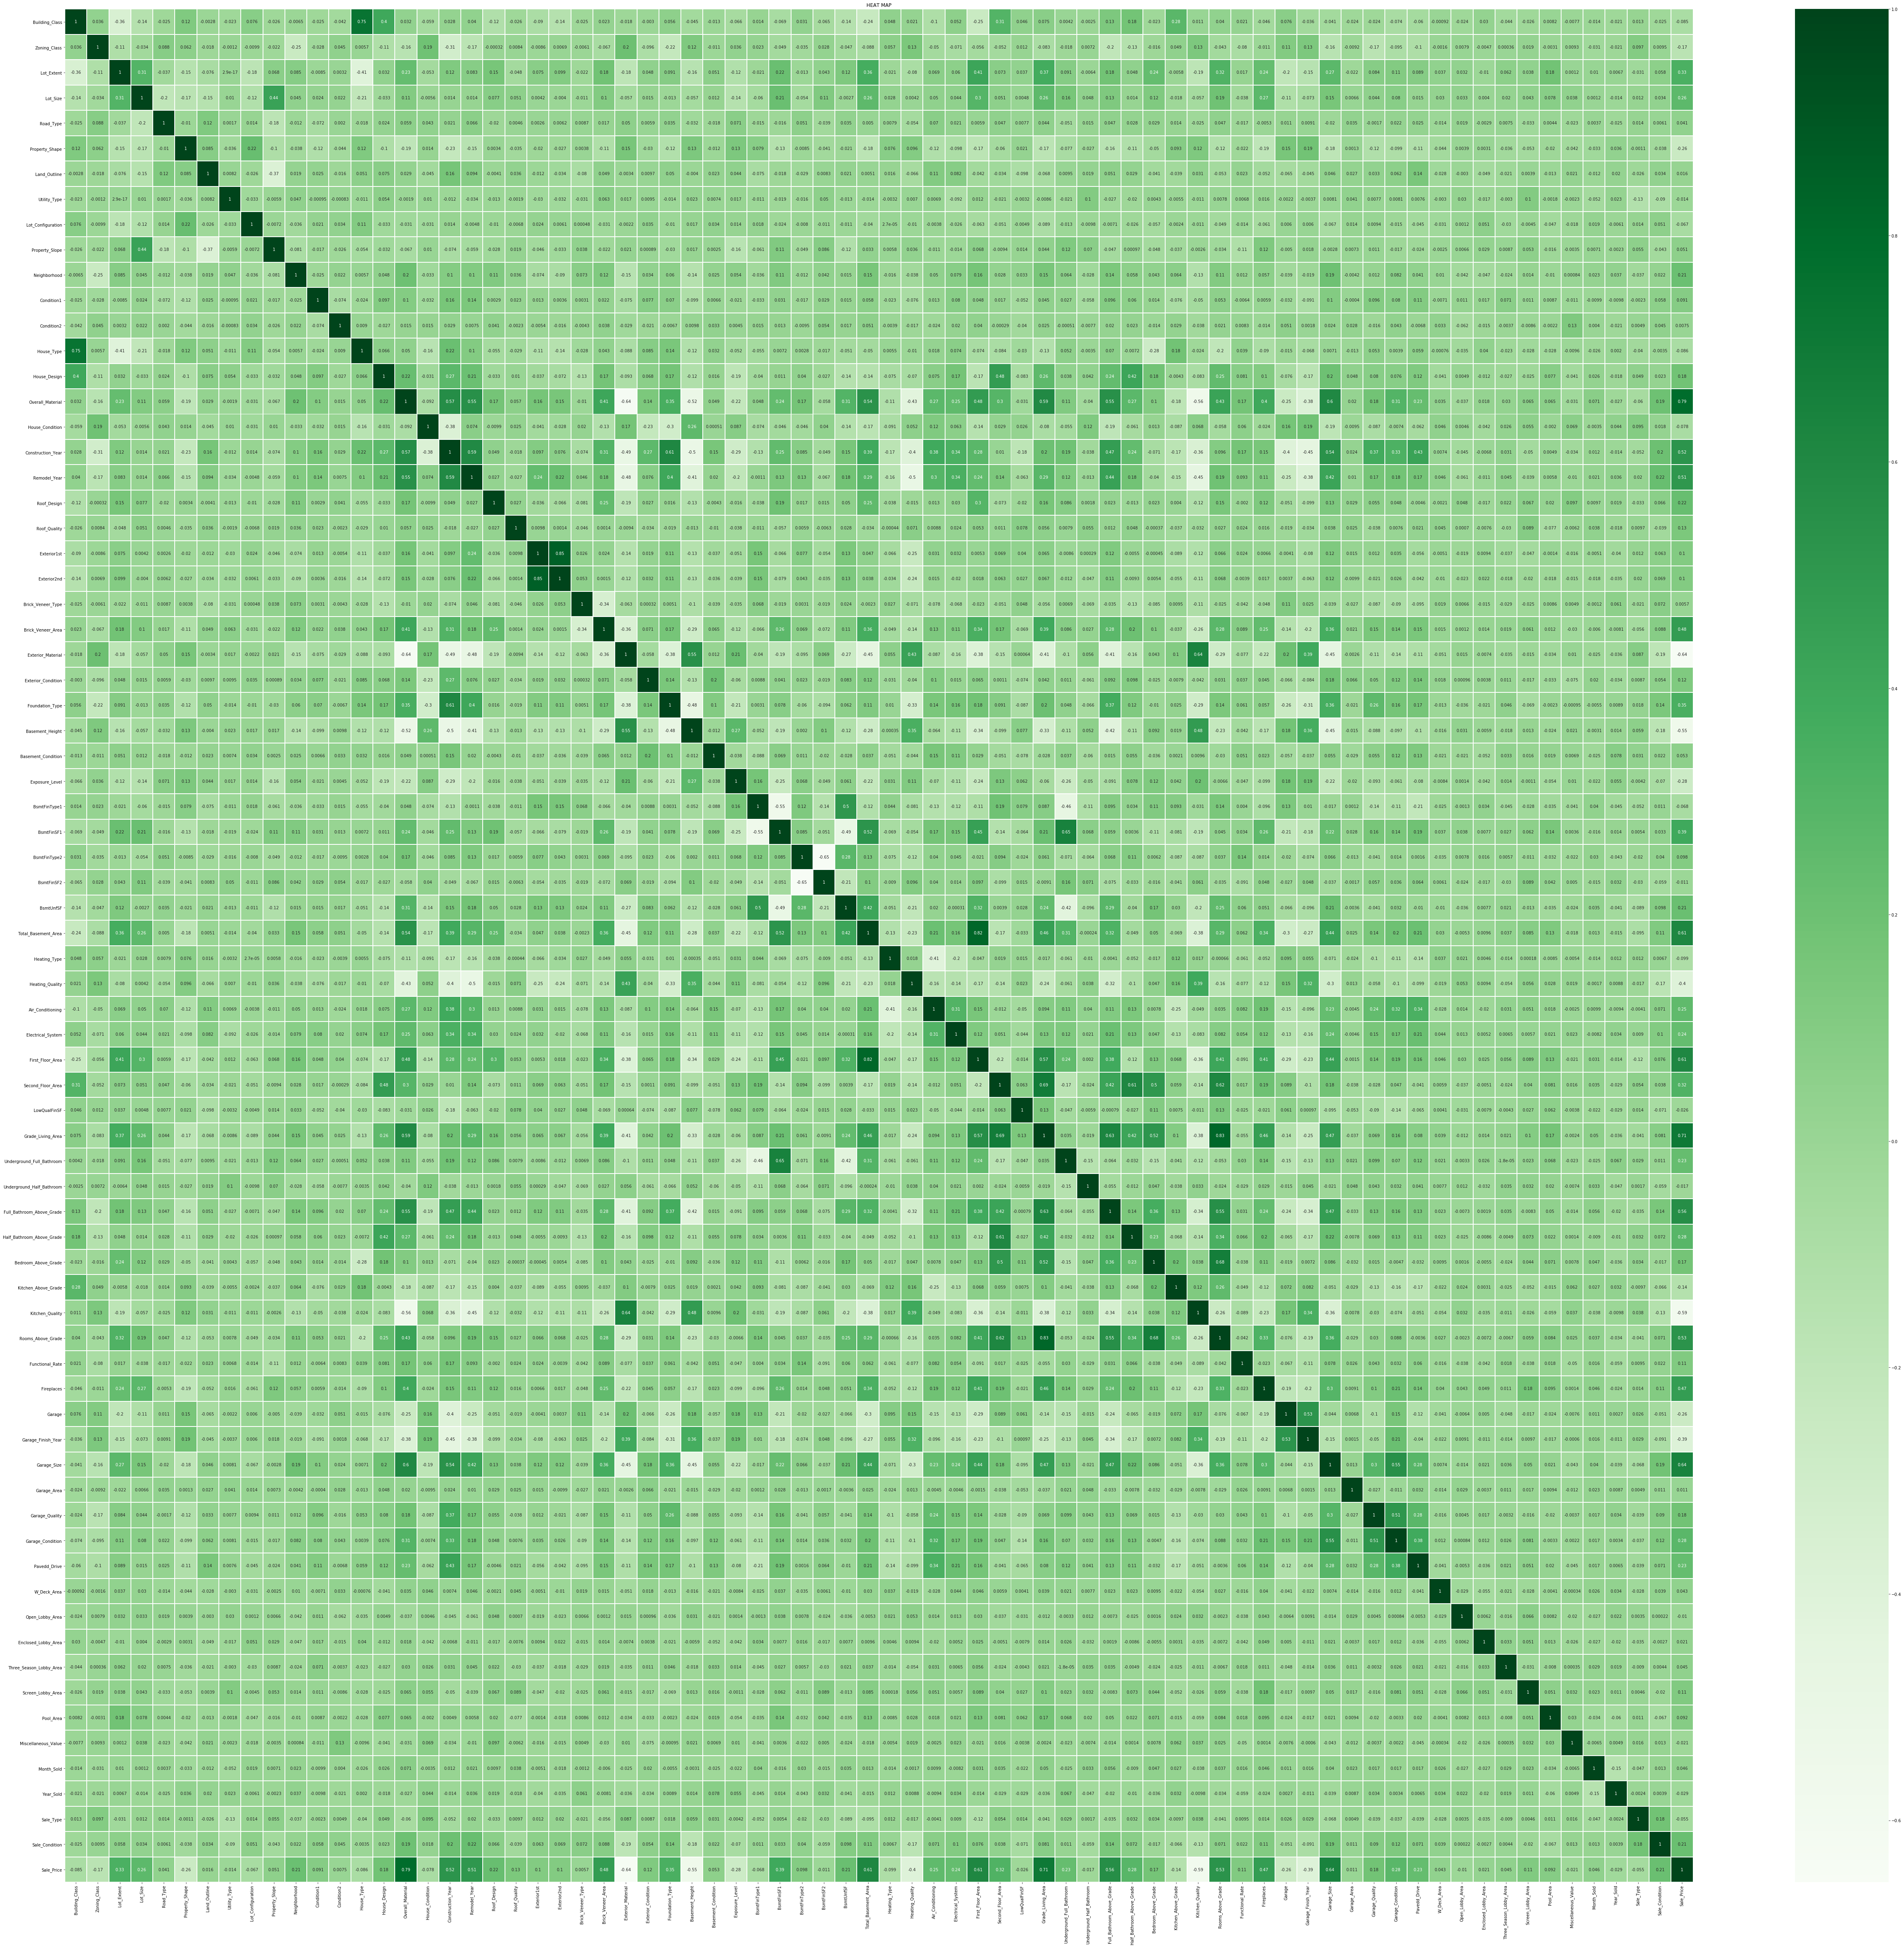

In [36]:
plt.figure(figsize=(90,85))
heatmap=sns.heatmap(train_1,linewidth=1,annot=True,cmap=plt.cm.Greens)
plt.title('HEAT MAP')
plt.show()

### outlier treatement

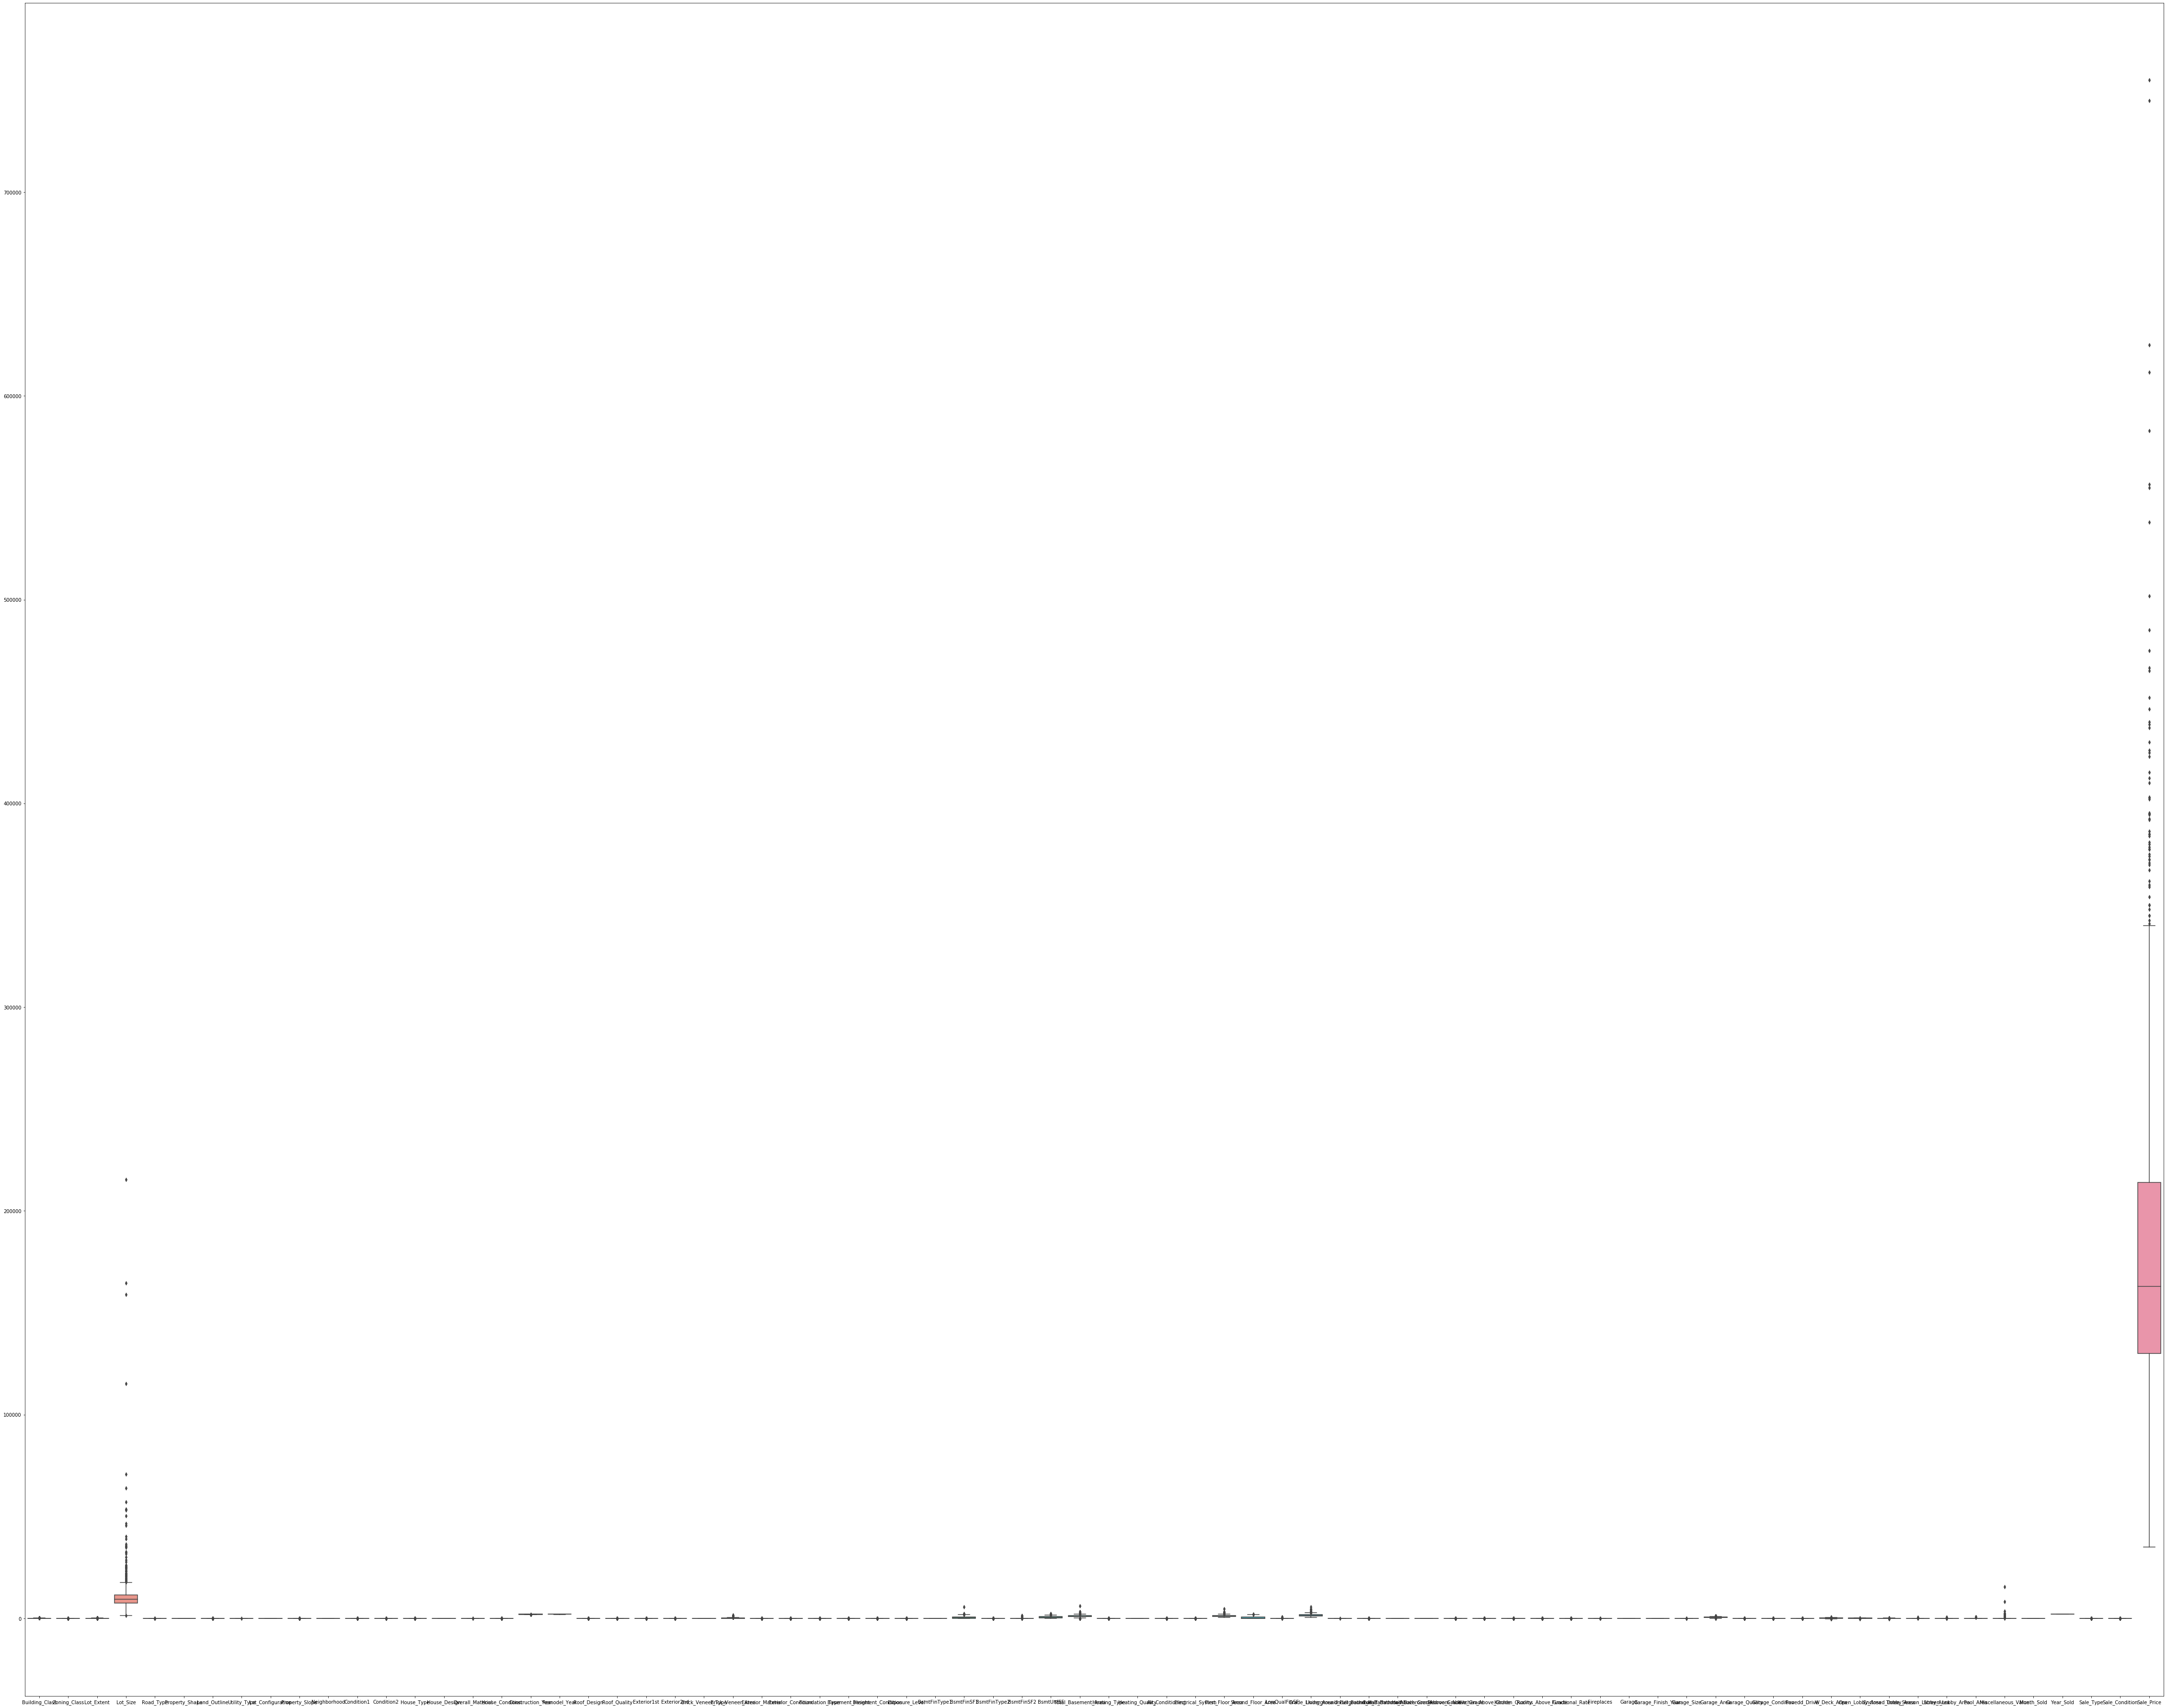

In [37]:
fig=plt.figure(figsize=(80,65))
sns.boxplot(data=train)

In [38]:
import math
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
numerical_features = list(train.select_dtypes(include=[np.number]).columns.values)

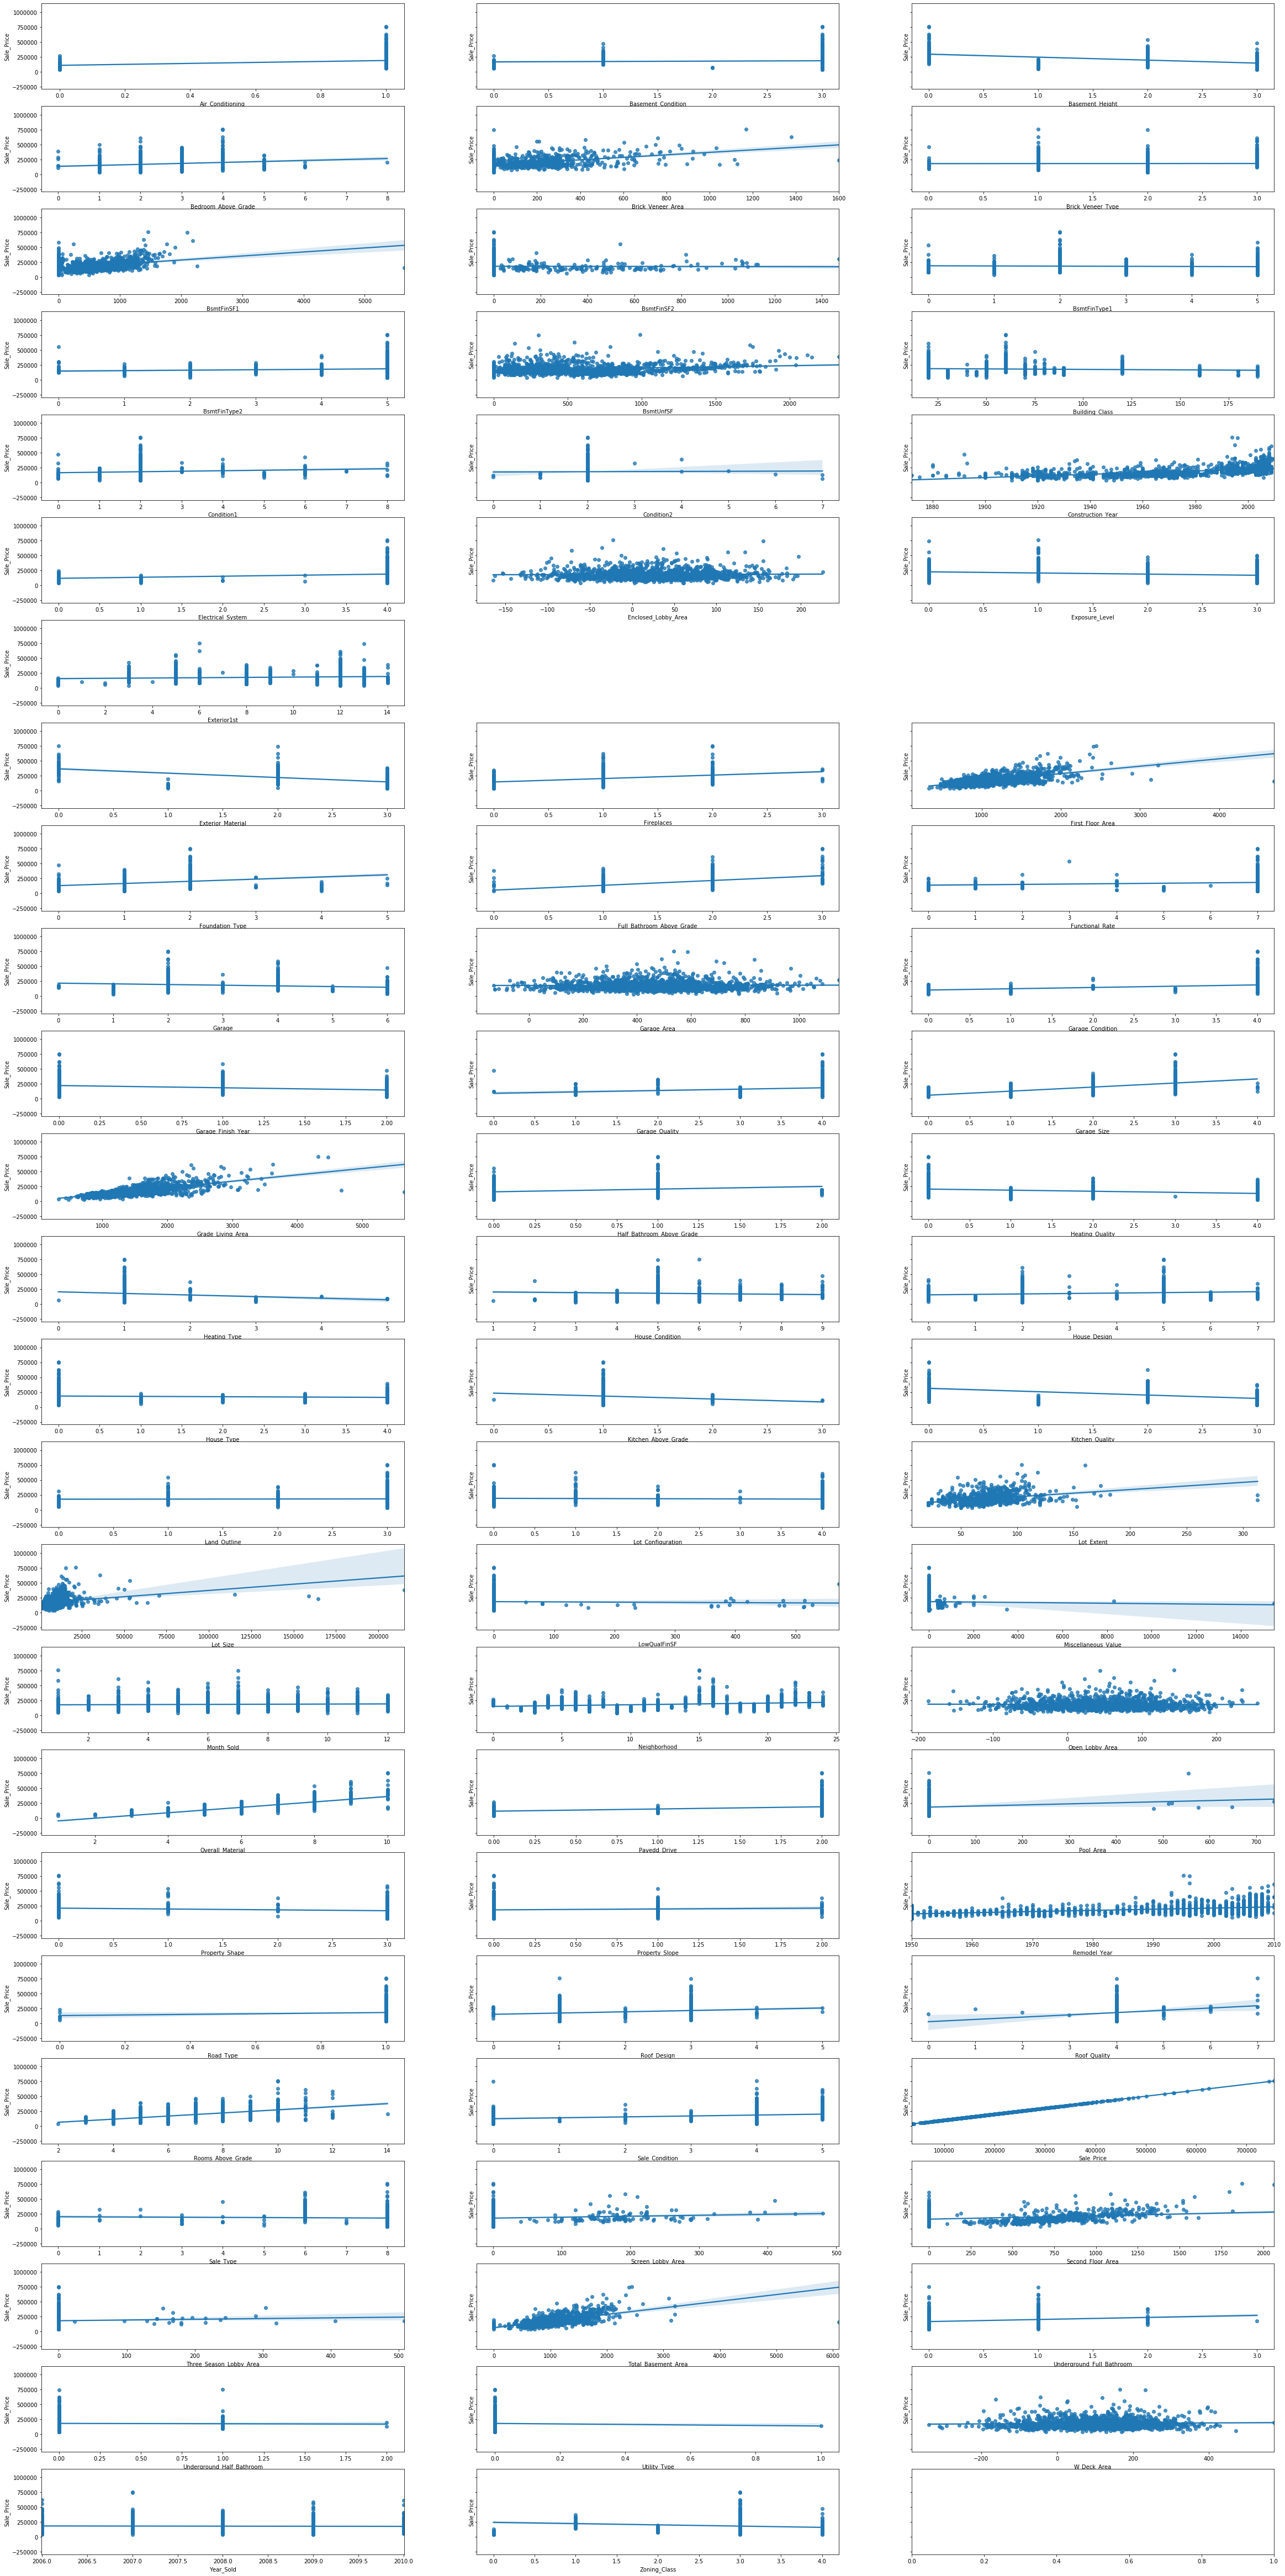

In [40]:
fig,ax = plt.subplots(math.ceil(len(numerical_features)/3),3,figsize=(40,85),sharey=True)
i ,j = 0, 0
for col in sorted(numerical_features):
    sns.regplot(col,'Sale_Price',data=train,ax=ax[i][j])
    if j == 2:
        j=0
        i +=1
    else:
        j +=1
ax[6][1].set_visible(False)
ax[6][2].set_visible(False)

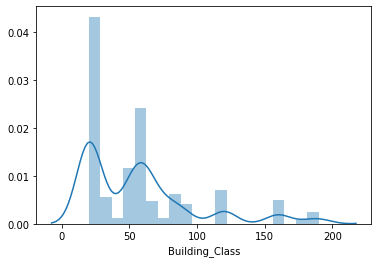

In [41]:
sns.distplot(train['Building_Class'])

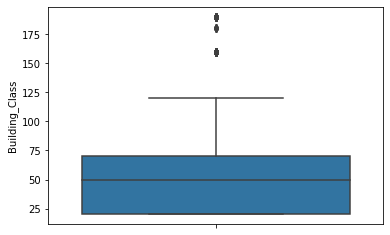

In [42]:
sns.boxplot(data=train,y='Building_Class')

### IQR Method

In [43]:
IQR=train.Building_Class.quantile(0.75)-train.Building_Class.quantile(0.25)     #IQR=Q3-Q1
IQR

50.0

In [44]:
lb=train["Building_Class"].quantile(0.25)-(IQR*3)    #q1-1.5*iqr---->lower(min) range value
ub=train["Building_Class"].quantile(0.75)+(IQR*3)    #q3+1.5*iqr----->upper(max) range value
lb,ub

(-130.0, 220.0)

In [45]:
train.loc[train['Building_Class']>220.0,'Building_Class']=220.0

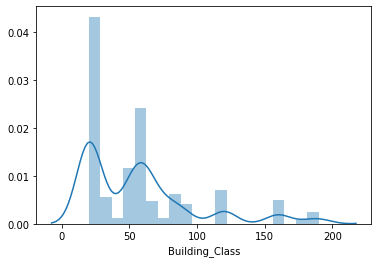

In [46]:
sns.distplot(train['Building_Class'])

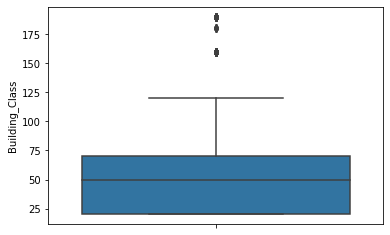

In [47]:
sns.boxplot(data=train,y='Building_Class')

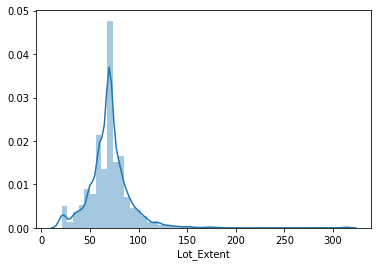

In [48]:
sns.distplot(train['Lot_Extent'])

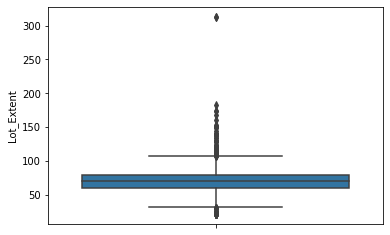

In [49]:
sns.boxplot(data=train,y='Lot_Extent')

In [50]:
IQR_1=train.Lot_Extent.quantile(0.75)-train.Lot_Extent.quantile(0.25)     #IQR=Q3-Q1
IQR_1

19.0

In [51]:
lb_1=train["Lot_Extent"].quantile(0.25)-(IQR_1*3)    #q1-1.5*iqr---->lower(min) range value
ub_1=train["Lot_Extent"].quantile(0.75)+(IQR_1*3)    #q3+1.5*iqr----->upper(max) range value
lb_1,ub_1

(3.0, 136.0)

In [52]:
train.loc[train['Lot_Extent']>136.0,'Lot_Extent']=136.0

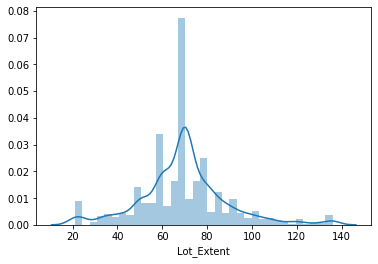

In [53]:
sns.distplot(train['Lot_Extent'])

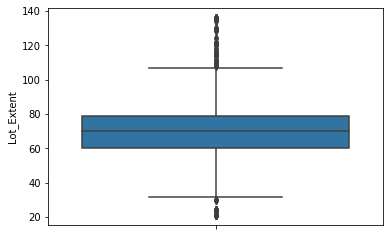

In [54]:
sns.boxplot(data=train,y='Lot_Extent')

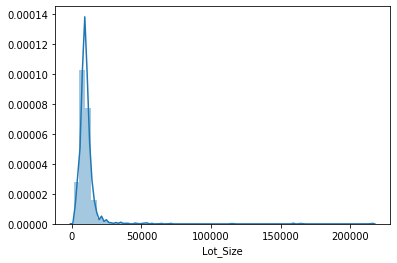

In [55]:
sns.distplot(train['Lot_Size'])

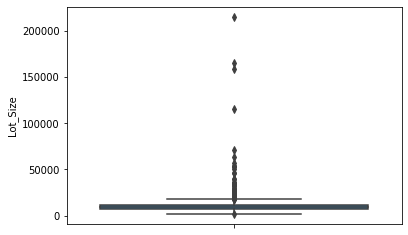

In [56]:
sns.boxplot(data=train,y='Lot_Size')

In [57]:
IQR_2=train.Lot_Size.quantile(0.75)-train.Lot_Size.quantile(0.25)     #IQR=Q3-Q1
IQR_2

4054.0

In [58]:
lb_2=train["Lot_Size"].quantile(0.25)-(IQR_2*3)    #q1-1.5*iqr---->lower(min) range value
ub_2=train["Lot_Size"].quantile(0.75)+(IQR_2*3)    #q3+1.5*iqr----->upper(max) range value
lb_2,ub_2

(-4613.0, 23765.0)

In [59]:
train.loc[train['Lot_Size']>23765.0,'Lot_Size']=23765.0

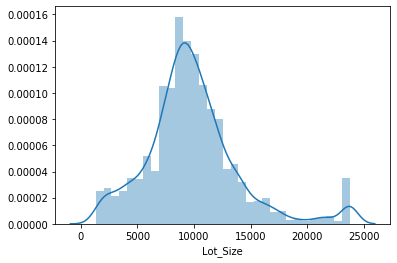

In [60]:
sns.distplot(train['Lot_Size'])

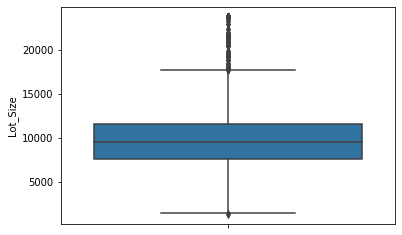

In [61]:
sns.boxplot(data=train,y='Lot_Size')

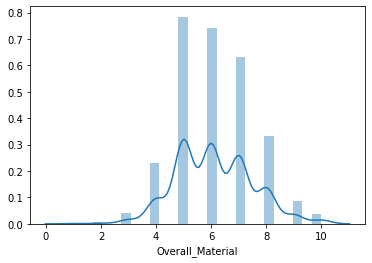

In [62]:
sns.distplot(train['Overall_Material'])

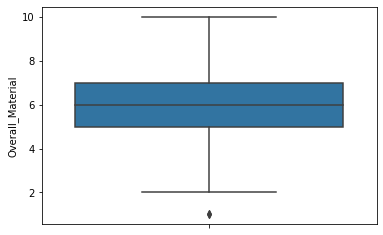

In [63]:
sns.boxplot(data=train,y='Overall_Material')

In [64]:
IQR_3=train.Lot_Size.quantile(0.75)-train.Lot_Size.quantile(0.25)     #IQR=Q3-Q1
IQR_3

4054.0

In [65]:
lb_3=train["Overall_Material"].quantile(0.25)-(IQR_3*3)    #q1-1.5*iqr---->lower(min) range value
ub_3=train["Overall_Material"].quantile(0.75)+(IQR_3*3)    #q3+1.5*iqr----->upper(max) range value
lb_3,ub_3

(-12157.0, 12169.0)

In [66]:
train.loc[train['Overall_Material']> 12169.0,'Overall_Material']= 12169.0

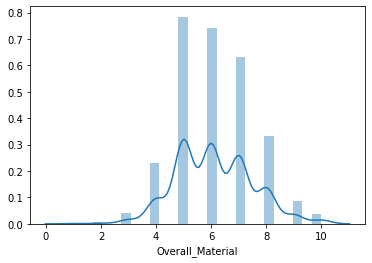

In [67]:
sns.distplot(train['Overall_Material'])

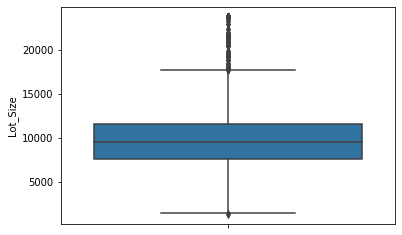

In [68]:
sns.boxplot(data=train,y='Lot_Size')

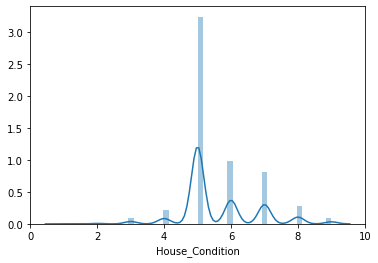

In [69]:
sns.distplot(train['House_Condition'])

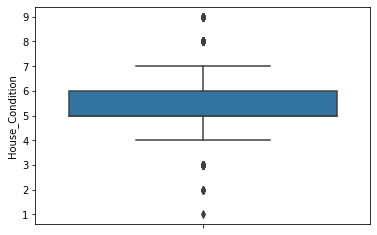

In [70]:
sns.boxplot(data=train,y='House_Condition')

In [71]:
IQR_4=train.Lot_Size.quantile(0.75)-train.Lot_Size.quantile(0.25)     #IQR=Q3-Q1
IQR_4

4054.0

In [72]:
lb_4=train["House_Condition"].quantile(0.25)-(IQR_4*3)    #q1-1.5*iqr---->lower(min) range value
ub_4=train["House_Condition"].quantile(0.75)+(IQR_4*3)    #q3+1.5*iqr----->upper(max) range value
lb_4,ub_4

(-12157.0, 12168.0)

In [73]:
train.loc[train['House_Condition']>12168.0,'House_Condition']=12168.0

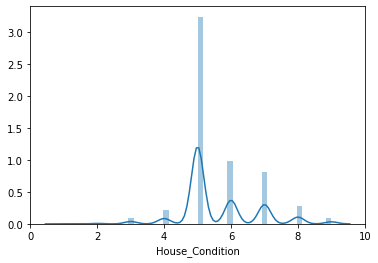

In [74]:
sns.distplot(train['House_Condition'])

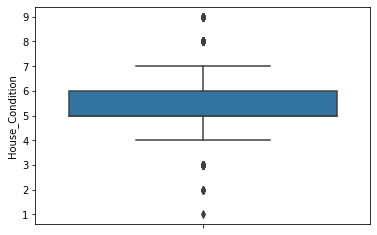

In [75]:
sns.boxplot(data=train,y='House_Condition')

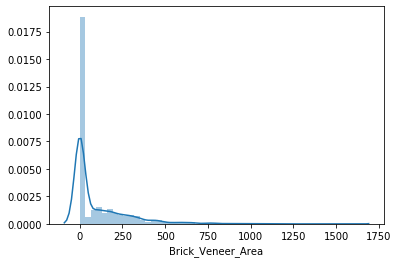

In [76]:
sns.distplot(train['Brick_Veneer_Area'])

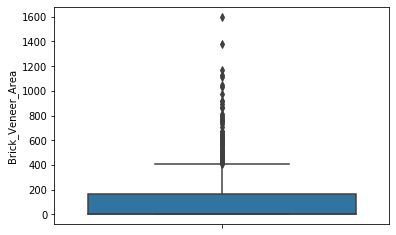

In [77]:
sns.boxplot(data=train,y='Brick_Veneer_Area')

In [78]:
IQR_5=train.Lot_Size.quantile(0.75)-train.Lot_Size.quantile(0.25)     #IQR=Q3-Q1
IQR_5

4054.0

In [79]:
lb_5=train["Brick_Veneer_Area"].quantile(0.25)-(IQR_5*3)    #q1-1.5*iqr---->lower(min) range value
ub_5=train["Brick_Veneer_Area"].quantile(0.75)+(IQR_5*3)    #q3+1.5*iqr----->upper(max) range value
lb_5,ub_5

(-12162.0, 12326.5)

In [80]:
train.loc[train['Brick_Veneer_Area']>12326.0,'Brick_Veneer_Area']=12326.0

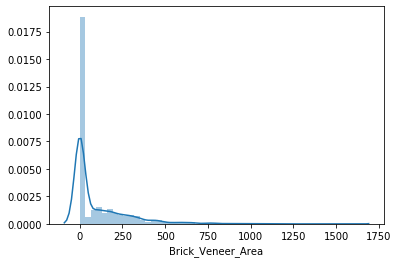

In [81]:
sns.distplot(train['Brick_Veneer_Area'])

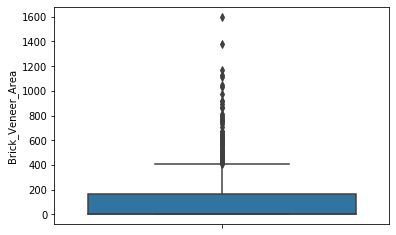

In [82]:
sns.boxplot(data=train,y='Brick_Veneer_Area')

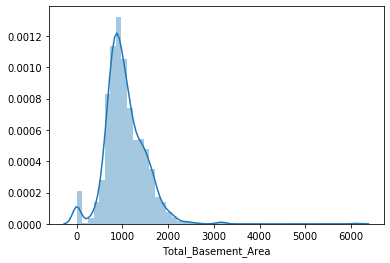

In [83]:
sns.distplot(train['Total_Basement_Area'])

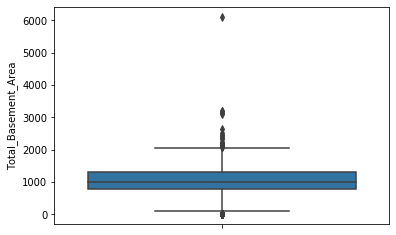

In [84]:
sns.boxplot(data=train,y='Total_Basement_Area')

In [85]:
IQR_6=train.Lot_Size.quantile(0.75)-train.Lot_Size.quantile(0.25)     #IQR=Q3-Q1
IQR_6

4054.0

In [86]:
lb_6=train["Total_Basement_Area"].quantile(0.25)-(IQR_6*3)    #q1-1.5*iqr---->lower(min) range value
ub_6=train["Total_Basement_Area"].quantile(0.75)+(IQR_6*3)    #q3+1.5*iqr----->upper(max) range value
lb_6,ub_6

(-11366.5, 13460.5)

In [87]:
train.loc[train['Total_Basement_Area']>13460.5,'Total_Basement_Area']=13460.5

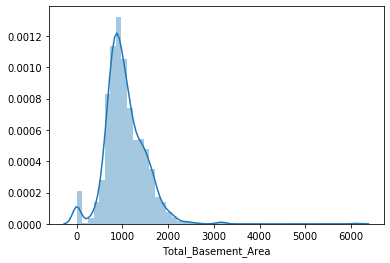

In [88]:
sns.distplot(train['Total_Basement_Area'])

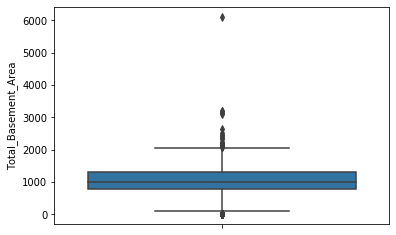

In [89]:
sns.boxplot(data=train,y='Total_Basement_Area')

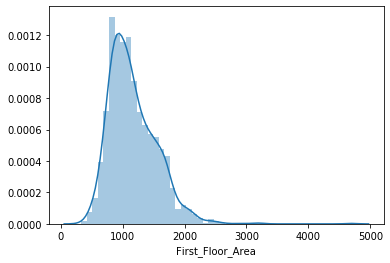

In [90]:
sns.distplot(train['First_Floor_Area'])

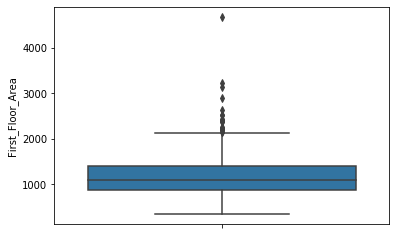

In [91]:
sns.boxplot(data=train,y='First_Floor_Area')

In [92]:
IQR_7=train.Lot_Size.quantile(0.75)-train.Lot_Size.quantile(0.25)     #IQR=Q3-Q1
IQR_7

4054.0

In [93]:
lb_7=train["First_Floor_Area"].quantile(0.25)-(IQR_7*3)    #q1-1.5*iqr---->lower(min) range value
ub_7=train["First_Floor_Area"].quantile(0.75)+(IQR_7*3)    #q3+1.5*iqr----->upper(max) range value
lb_7,ub_7

(-11280.0, 13553.5)

In [94]:
train.loc[train['First_Floor_Area']>13553.5,'First_Floor_Area']=13553.5

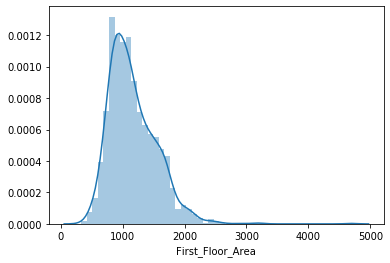

In [95]:
sns.distplot(train['First_Floor_Area'])

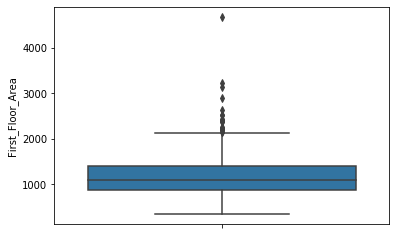

In [96]:
sns.boxplot(data=train,y='First_Floor_Area')

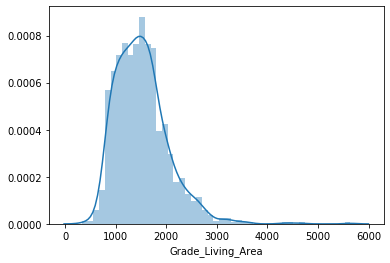

In [97]:
sns.distplot(train['Grade_Living_Area'])

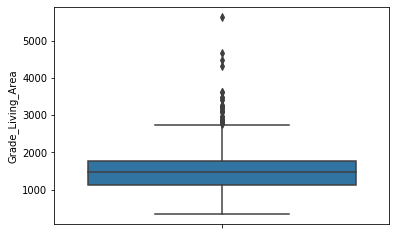

In [98]:
sns.boxplot(data=train,y='Grade_Living_Area')

In [99]:
IQR_8=train.Lot_Size.quantile(0.75)-train.Lot_Size.quantile(0.25)     #IQR=Q3-Q1
IQR_8

4054.0

In [100]:
lb_8=train["Grade_Living_Area"].quantile(0.25)-(IQR_8*3)    #q1-1.5*iqr---->lower(min) range value
ub_8=train["Grade_Living_Area"].quantile(0.75)+(IQR_8*3)    #q3+1.5*iqr----->upper(max) range value
lb_8,ub_8

(-11033.0, 13939.5)

In [101]:
train.loc[train['Grade_Living_Area']>13939.5,'Grade_Living_Area']=13939.5

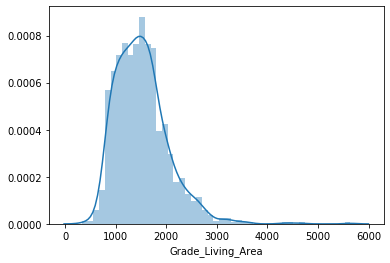

In [102]:
sns.distplot(train['Grade_Living_Area'])

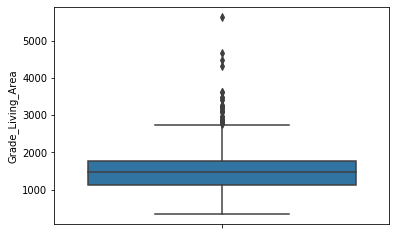

In [103]:
sns.boxplot(data=train,y='Grade_Living_Area')

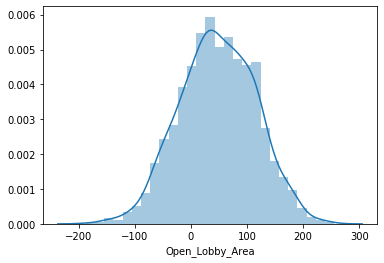

In [104]:
sns.distplot(train['Open_Lobby_Area'])

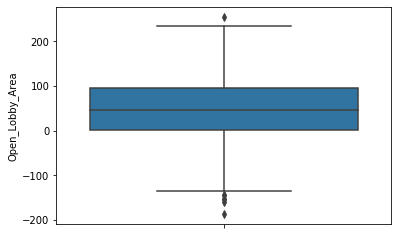

In [105]:
sns.boxplot(data=train,y='Open_Lobby_Area')

In [106]:
IQR_9=train.Lot_Size.quantile(0.75)-train.Lot_Size.quantile(0.25)     #IQR=Q3-Q1
IQR_9

4054.0

In [107]:
lb_9=train["Open_Lobby_Area"].quantile(0.25)-(IQR_5*3)    #q1-1.5*iqr---->lower(min) range value
ub_9=train["Open_Lobby_Area"].quantile(0.75)+(IQR_5*3)    #q3+1.5*iqr----->upper(max) range value
lb_9,ub_9

(-12160.1568142075, 12258.52348571)

In [108]:
train.loc[train['Open_Lobby_Area']>12258.5,'Open_Lobby_Area']=12258.5

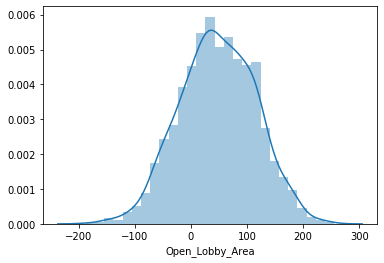

In [109]:
sns.distplot(train['Open_Lobby_Area'])

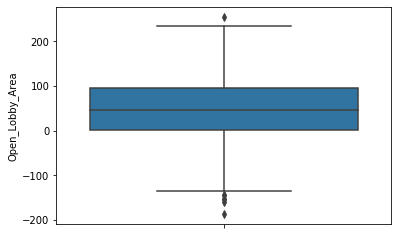

In [110]:
sns.boxplot(data=train,y='Open_Lobby_Area')

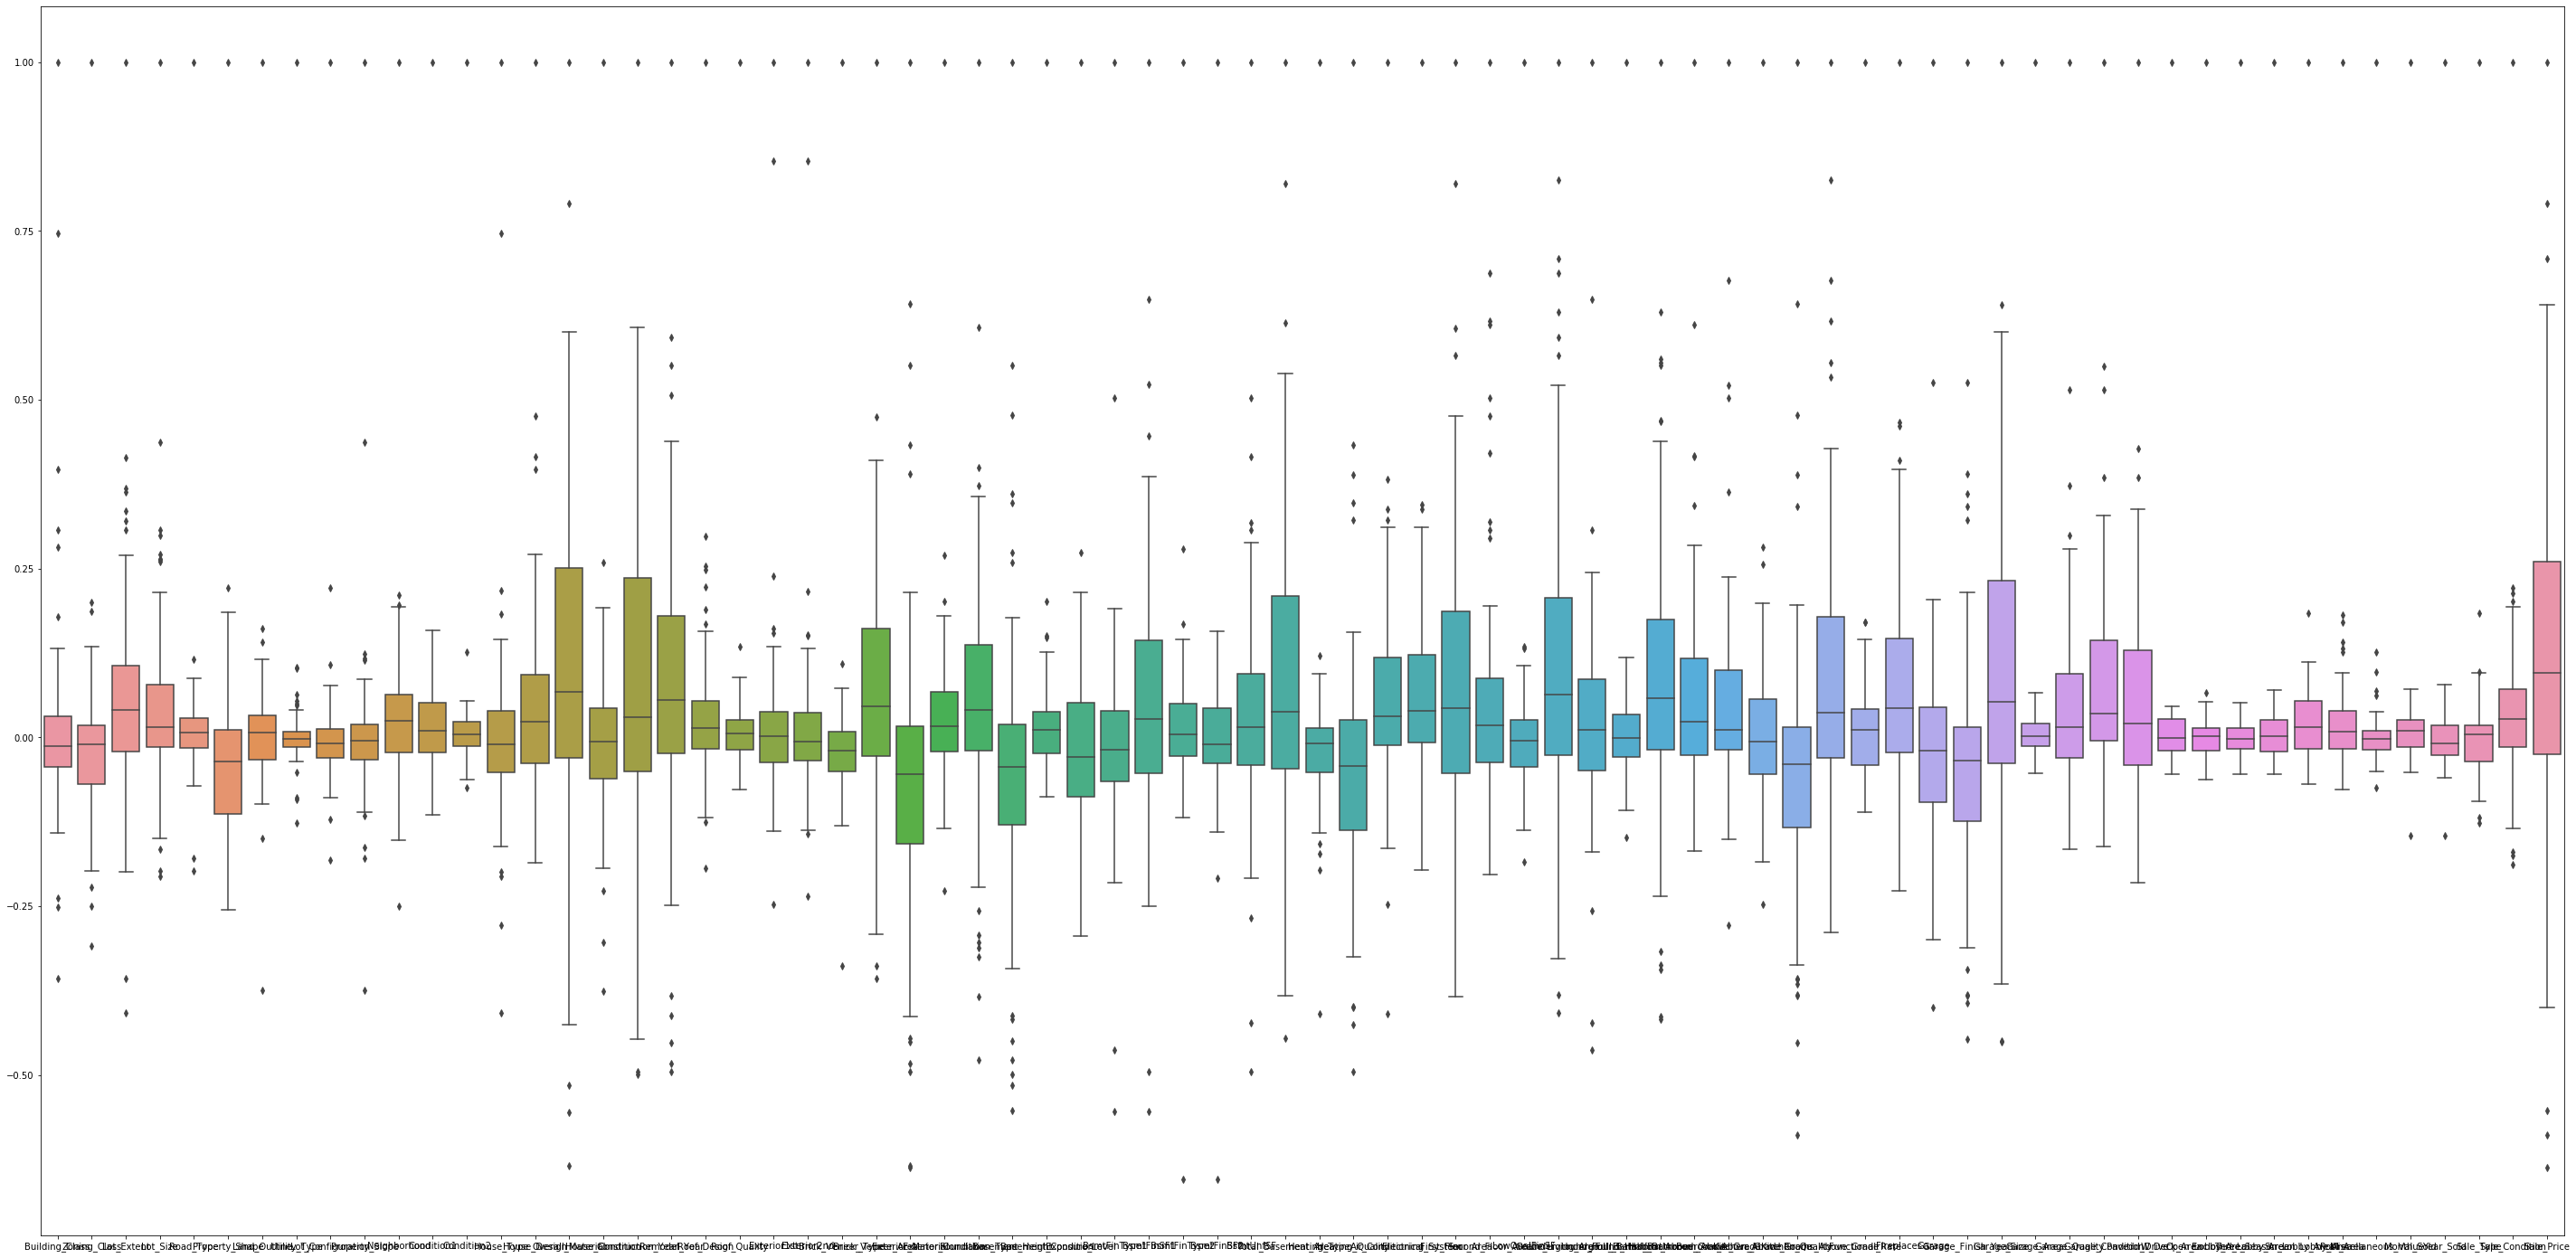

In [111]:
fig=plt.figure(figsize=(50,25))
sns.boxplot(data=train_1)

In [112]:
train.shape

(1459, 74)

### Building model on train data

In [113]:
train_x=train.iloc[:,1:74]
train_y=train.iloc[:,-1]
test_x=test.iloc[:,1:]
train_x.shape,train_y.shape,test_x.shape

((1459, 73), (1459,), (1459, 72))

In [114]:
train_y.head(2)

0    208500
1    181500
Name: Sale_Price, dtype: int64

In [115]:
import sklearn
from sklearn.model_selection import train_test_split

In [116]:
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2,random_state=101)

In [117]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1167, 73), (292, 73), (1167,), (292,))

### LinearRegression method

In [118]:
from sklearn import linear_model
lin=linear_model.LinearRegression()

In [119]:
lin.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
lin_pred=lin.predict(x_test)
lin_pred

array([129000., 169500.,  86000., 159000., 149900., 158000., 244000.,
       179200., 189950., 145250., 139000., 184000., 311500., 162000.,
       129000., 125000., 240000., 255000., 114504., 135000., 105000.,
       412500., 197500., 208500.,  52500., 109900., 117000., 155000.,
       107500., 127000., 184000., 133000., 244000., 178000., 135000.,
       128000., 367294., 156000., 402861., 223500., 175900., 208900.,
       226700., 132500., 190000., 153500., 104900., 127000., 135960.,
        37900., 124000., 152000., 150000., 133000., 172785.,  80000.,
        93500., 166000., 174000., 144000., 174000., 157000., 107500.,
       272000., 187500., 294000., 179900., 180500., 146800., 136500.,
       176000., 135000., 187000., 123000., 106250., 302000., 124500.,
        83500., 194500.,  84000., 133500., 235000., 165400., 150750.,
       135000., 220000., 230000., 108000., 165000., 148000., 176000.,
       395000., 187500., 139000., 108480., 250000., 169000., 319900.,
       122500., 2170

In [121]:
lin.intercept_

2.5902409106492996e-09

In [122]:
lin.coef_

array([-1.20259920e-11, -1.31883393e-12, -1.08628384e-14, -5.60487871e-11,
       -1.52841802e-12,  9.51350977e-13,  2.50125002e-11, -7.35117262e-13,
        2.80890589e-12,  3.26370956e-13, -3.19855011e-12,  1.25952056e-11,
       -1.31849212e-11,  2.96300290e-13,  2.22372233e-12, -3.51815736e-12,
       -2.71745354e-13, -8.05985053e-15,  1.69214002e-12, -1.32844643e-11,
        4.59572184e-13, -3.91017310e-13, -1.81943735e-11, -1.33343315e-13,
       -8.13699732e-12, -1.70052998e-12,  4.98776727e-12,  9.85831436e-12,
       -1.65095095e-12,  5.67029501e-12,  2.49689931e-12, -6.95878901e-15,
        2.65455644e-12,  1.33538573e-14, -8.68072907e-15, -2.27181013e-15,
       -8.88509894e-13, -5.03154071e-13,  4.91947867e-12, -3.52007895e-12,
       -2.48390989e-14, -2.86418025e-14,  3.10122750e-14, -2.24932648e-14,
        7.20785326e-12,  1.41900994e-11, -1.79828068e-12, -4.43808434e-12,
        3.65302505e-12,  1.49479071e-11,  4.85989646e-12, -2.67710309e-12,
        1.43190134e-13, -

In [123]:
R2=lin.score(x_train,y_train)
R2

1.0

In [124]:
AdjR2=1-(((1-R2)*(1167-1))/(1167-73-1))
AdjR2

1.0

In [125]:
from sklearn import metrics

In [126]:
train_mae=metrics.mean_absolute_error(y_test,lin_pred)
train_mae

4.923730221104949e-11

In [127]:
train_mse=metrics.mean_squared_error(y_test,lin_pred)
train_mse

5.832053905667023e-21

In [128]:
rmse=np.sqrt(train_mse)
rmse

7.63678853030973e-11

In [129]:
error=y_test-lin_pred
error

666     1.455192e-10
104     0.000000e+00
528    -5.820766e-11
18      5.820766e-11
1151    2.037268e-10
            ...     
189     0.000000e+00
682    -8.731149e-11
175     2.910383e-11
650    -8.731149e-11
824    -2.910383e-11
Name: Sale_Price, Length: 292, dtype: float64

In [130]:
ab_error=np.abs(error)
ab_error

666     1.455192e-10
104     0.000000e+00
528     5.820766e-11
18      5.820766e-11
1151    2.037268e-10
            ...     
189     0.000000e+00
682     8.731149e-11
175     2.910383e-11
650     8.731149e-11
824     2.910383e-11
Name: Sale_Price, Length: 292, dtype: float64

In [131]:
MAPE=np.mean(ab_error/y_test)*100
MAPE

3.040244039546742e-14

In [132]:
Accuracy1=100-MAPE
Accuracy1

99.99999999999997

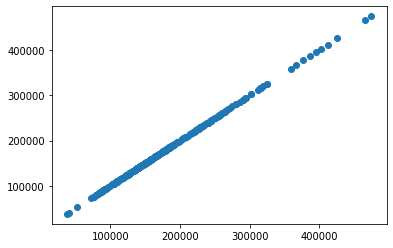

In [133]:
plt.scatter(y_test,lin_pred)

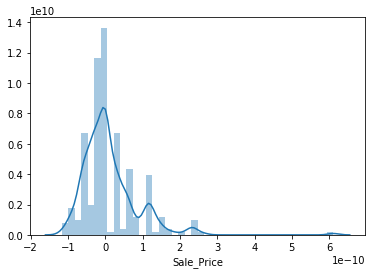

In [134]:
sns.distplot(y_test-lin_pred)

### LASSO Method

In [135]:
#LASSO(L1)
from sklearn.linear_model import Lasso
lasso=Lasso()

In [136]:
lasso.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [137]:
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00, -1.95319801e-06, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -1.80409179e-04,
        0.00000000e+00, -1.26364734e-04, -1.47626923e-04, -4.83833347e-05,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.36184402e-04, -2.97786846e-05,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [138]:
l_p=lasso.predict(x_test)
l_p

array([129000.01567401, 169500.01085929,  86000.00142807, 158999.96875296,
       149899.95123064, 157999.95723359, 243999.89885305, 179199.96810305,
       189950.01193633, 145249.95345186, 139000.00774291, 183999.99321023,
       311500.08170505, 161999.97864442, 128999.96775011, 125000.00331057,
       239999.95058435, 254999.98523382, 114503.99573268, 134999.98214592,
       105000.00416877, 412500.00639284, 197500.03943754, 208499.98847356,
        52499.98769657, 109900.18962841, 116999.98671219, 154999.986185  ,
       107500.01135699, 126999.99096726, 183999.97232333, 132999.98811832,
       243999.93719633, 178000.01051586, 135000.03359082, 127999.9728243 ,
       367294.00410364, 155999.99210129, 402860.99989644, 223499.99252715,
       175900.00151801, 208900.01579094, 226700.00171721, 132499.98631321,
       189999.94036935, 153499.97239622, 104899.99549038, 127000.00989226,
       135959.97228216,  37899.97244899, 124000.00282994, 151999.99586547,
       149999.93101057, 1

In [139]:
l_R2=lasso.score(x_train,y_train)
l_R2

0.9999999999996502

In [140]:
Adjl_R2=1-(((1-l_R2)*(1167-1))/(1167-73-1))
Adjl_R2

0.9999999999996269

In [141]:
train_df=pd.DataFrame({"Impotances":list(lasso.coef_),"Columns":list(train_x)})
train_df

Impotances         Columns
0    -0.000000    Zoning_Class
1     0.000000      Lot_Extent
2    -0.000002        Lot_Size
3    -0.000000       Road_Type
4    -0.000000  Property_Shape
..         ...             ...
68   -0.000000      Month_Sold
69   -0.000000       Year_Sold
70    0.000000       Sale_Type
71    0.000000  Sale_Condition
72    1.000000      Sale_Price

[73 rows x 2 columns]

### Ridge Method

In [142]:
from sklearn.linear_model import Ridge
rd=Ridge()

In [143]:
rd.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [144]:
r_p=rd.predict(x_test)
r_p

array([129000.00000009, 169500.00000001,  85999.99999998, 158999.99999999,
       149900.00000002, 158000.00000003, 244000.0000001 , 179200.00000001,
       189949.99999998, 145250.00000001, 139000.00000002, 184000.00000001,
       311499.99999992, 161999.99999999, 128999.99999998, 124999.99999997,
       240000.00000001, 255000.00000001, 114504.00000001, 134999.99999999,
       105000.00000001, 412499.99999998, 197499.99999998, 208500.00000001,
        52500.00000001, 109899.99999998, 117000.        , 155000.00000003,
       107500.00000001, 126999.99999999, 184000.00000004, 133000.        ,
       244000.00000004, 178000.00000004, 135000.        , 127999.99999999,
       367293.99999999, 156000.        , 402860.99999998, 223499.99999999,
       175900.00000001, 208899.99999999, 226699.99999998, 132499.99999999,
       190000.00000005, 153500.00000005, 104900.00000001, 126999.99999999,
       135960.00000001,  37900.00000001, 124000.        , 152000.        ,
       149999.99999997, 1

In [145]:
rd.coef_

array([-5.93130792e-10, -2.93971464e-11,  1.51467637e-12,  2.26079469e-08,
       -4.66390032e-10,  1.11915096e-09, -1.69171714e-08, -2.15164240e-10,
        4.18556888e-09,  3.09251750e-10, -2.11842270e-09, -1.25010780e-08,
       -3.45482207e-09, -1.19284690e-09,  1.00572454e-08,  6.18728630e-09,
        2.61258271e-10,  1.68955959e-11,  8.18854023e-10,  5.97592400e-09,
       -5.30654574e-10,  1.03381296e-11,  5.78313113e-09,  3.70007588e-11,
       -8.18484217e-09,  9.61802492e-11,  1.53871566e-09, -1.00826597e-08,
        1.89352224e-09, -2.85560193e-09,  2.97288133e-10,  4.29155488e-06,
        8.04431074e-10,  4.29154861e-06,  4.29153191e-06, -4.29150377e-06,
       -4.87328067e-09, -1.06446435e-09, -2.58627565e-09, -2.94899160e-10,
        5.38120688e-06,  5.38121671e-06,  5.38114381e-06, -5.38116075e-06,
        6.16771828e-10, -3.39799947e-09,  2.29172796e-10,  8.50488238e-10,
       -5.32472715e-09, -1.87492743e-08, -7.46120778e-09,  2.50214903e-09,
        2.57770829e-09,  

In [146]:
rd_r2=rd.score(x_train,y_train)
rd_r2

1.0

In [147]:
ad_rd2=1-(((1-rd_r2)*(1167-1))/(1167-73-1))
ad_rd2

1.0

In [148]:
r_df=pd.DataFrame({"coeff":list(rd.coef_),"column":list(train_x)})
r_df

coeff          column
0  -5.931308e-10    Zoning_Class
1  -2.939715e-11      Lot_Extent
2   1.514676e-12        Lot_Size
3   2.260795e-08       Road_Type
4  -4.663900e-10  Property_Shape
..           ...             ...
68 -1.383252e-10      Month_Sold
69 -3.783015e-10       Year_Sold
70 -6.854090e-10       Sale_Type
71  3.174607e-09  Sale_Condition
72  1.000000e+00      Sale_Price

[73 rows x 2 columns]

In [149]:
l1=["linear","lasso","ridge"]
l2=[R2,l_R2 ,rd_r2]
l3=[AdjR2,Adjl_R2 , ad_rd2]

In [150]:
final = pd.DataFrame({'modelname':l1,"R-Square":l2,"Adj_R-Square":l3})
final

modelname  R-Square  Adj_R-Square
0    linear       1.0           1.0
1     lasso       1.0           1.0
2     ridge       1.0           1.0